<a href="https://colab.research.google.com/github/lijerrymagic/MLColabAssignment/blob/master/ML_Assignment2_2020_summer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Assignment Question 2.a):** 



Import all needed libraries.

In [99]:
from sklearn import datasets
from sklearn import metrics
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set()

# for 3d interactive plots
from ipywidgets import interact, fixed
from mpl_toolkits import mplot3d


%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

First we read in the data and use the index_col=0 parameter to drop the first unamed column of the data set.

In [100]:
url = 'http://faculty.marshall.usc.edu/gareth-james/ISL/Advertising.csv'
df = pd.read_csv(url, index_col=0)
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


Visually inspect the data using seaborn pariplot.

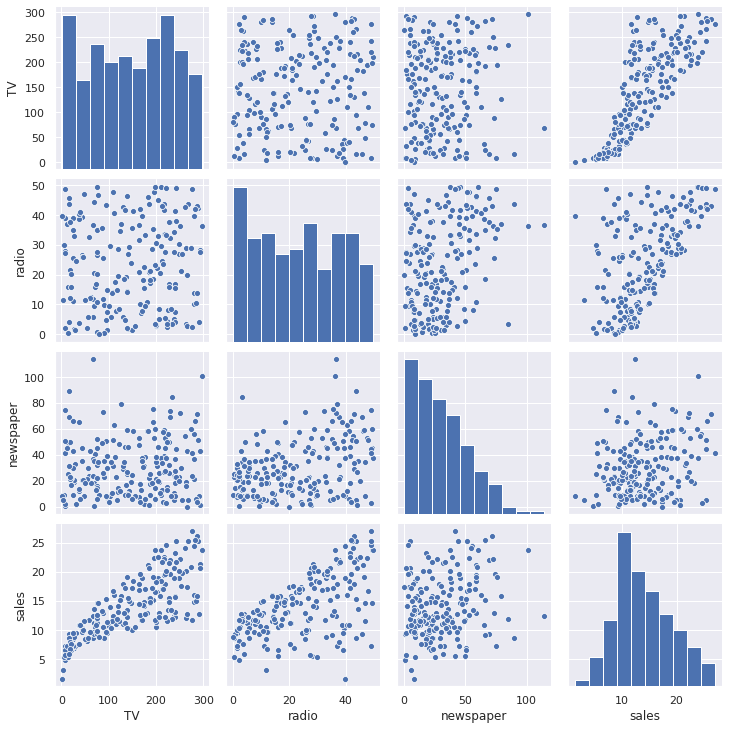

In [101]:
sns.pairplot(df);

From the pair plots above, it is obvious to see some relation between each media type(TV, radio, newspaper) with sales from the first three plots on the bootom of the grid. Among them, the relation of first two seems more strong as we can see as the TV number goes up, sales are also increasing in a genral trend. But the trend of the third one are not that obvious compare to the first two.

Next we split the data set into two sub sets. One for training, one for testing the model we trained. Inspect those two sets after we split them.

In [102]:
train, test = train_test_split(df, test_size=0.3)
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140 entries, 168 to 84
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         140 non-null    float64
 1   radio      140 non-null    float64
 2   newspaper  140 non-null    float64
 3   sales      140 non-null    float64
dtypes: float64(4)
memory usage: 5.5 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 181 to 125
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         60 non-null     float64
 1   radio      60 non-null     float64
 2   newspaper  60 non-null     float64
 3   sales      60 non-null     float64
dtypes: float64(4)
memory usage: 2.3 KB


**2.b)**

Train three linear regression model use the training set to predict sales for each of the three features: TV ad budget, radio ad budget, and newspaper ad budget. And compute MSE and R2 accordingly.

**TV ad budget**

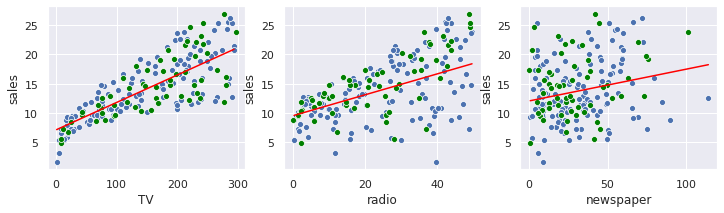

In [103]:
reg_tv = LinearRegression().fit(train[['TV']], train['sales'])
reg_radio = LinearRegression().fit(train[['radio']], train['sales'])
reg_news = LinearRegression().fit(train[['newspaper']], train['sales'])
fig = plt.figure(figsize=(12,3))

plt.subplot(1,3,1)
# train data
sns.scatterplot(data=train, x="TV", y="sales");
# test data with a different color
sns.scatterplot(data=test, x="TV", y="sales", color="green");
sns.lineplot(data=train, x="TV", y=reg_tv.predict(train[['TV']]), color='red');

plt.subplot(1,3,2)
# train data
sns.scatterplot(data=train, x="radio", y="sales");
# test data with a different color
sns.scatterplot(data=test, x="radio", y="sales", color="green");
sns.lineplot(data=train, x="radio", y=reg_radio.predict(train[['radio']]), color='red');

plt.subplot(1,3,3)
# train data
sns.scatterplot(data=train, x="newspaper", y="sales");
# test data with a different color
sns.scatterplot(data=test, x="newspaper", y="sales", color="green");
sns.lineplot(data=train, x="newspaper", y=reg_news.predict(train[['newspaper']]), color='red');


Print coefficient and intercept for each of the model trained.

In [104]:
print("TV: ", reg_tv.coef_[0], reg_tv.intercept_)
print("Radio: ", reg_radio.coef_[0], reg_radio.intercept_)
print("Newspaper: ", reg_news.coef_[0], reg_news.intercept_)

TV:  0.04696523261320711 7.099018036241639
Radio:  0.17932399003738378 9.512595125891629
Newspaper:  0.054562010393419375 12.031496740196628


Compute MSE and R2 for **training data** for each of the model

In [105]:
y_train_predict_tv = reg_tv.intercept_ + np.dot(train[["TV"]],reg_tv.coef_)
mse_tv = 1.0/(len(train)) * np.sum((train["sales"] - y_train_predict_tv)**2)
print("MSE for TV model for training data:", mse_tv)

y_train_predict_radio = reg_radio.intercept_ + np.dot(train[["radio"]],reg_radio.coef_)
mse_radio = 1.0/(len(train)) * np.sum((train["sales"] - y_train_predict_radio)**2)
print("MSE for radio model training data:", mse_radio)

y_train_predict_newspaper = reg_news.intercept_ + np.dot(train[["newspaper"]],reg_news.coef_)
mse_newspaper = 1.0/(len(train)) * np.sum((train["sales"] - y_train_predict_newspaper)**2)
print("MSE for newspaper model training data:", mse_newspaper,"\n")

r2_tv_train = 1-np.mean( (y_train_predict_tv - train['sales'])**2 / np.std(train['sales'])**2 )
r2_radio_train = 1-np.mean( (y_train_predict_radio - train['sales'])**2 / np.std(train['sales'])**2 )
r2_news_train = 1-np.mean( (y_train_predict_newspaper - train['sales'])**2 / np.std(train['sales'])**2 )
print("R2 for TV model for training data: ", r2_tv_train)
print("R2 for Radio model for training data: ", r2_radio_train)
print("R2 for Newspaper model for training data: ", r2_news_train)

MSE for TV model for training data: 10.10976000710021
MSE for radio model training data: 19.880695177253436
MSE for newspaper model training data: 25.64382039699437 

R2 for TV model for training data:  0.6266005641127552
R2 for Radio model for training data:  0.26571547108743077
R2 for Newspaper model for training data:  0.05285703483499038


Compute MSE and R2 for **testing data** for each of the model

In [106]:
y_test_predict_tv = reg_tv.intercept_ + np.dot(test[["TV"]],reg_tv.coef_)
mse_tv = 1.0/(len(test)) * np.sum((test["sales"] - y_test_predict_tv)**2)
print("MSE for TV model for testing data:", mse_tv)

y_test_predict_radio = reg_radio.intercept_ + np.dot(test[["radio"]],reg_radio.coef_)
mse_radio = 1.0/(len(test)) * np.sum((test["sales"] - y_test_predict_radio)**2)
print("MSE for radio model testing data:", mse_radio)

y_test_predict_newspaper = reg_news.intercept_ + np.dot(test[["newspaper"]],reg_news.coef_)
mse_newspaper = 1.0/(len(test)) * np.sum((test["sales"] - y_test_predict_newspaper)**2)
print("MSE for newspaper model testing data:", mse_newspaper,"\n")

r2_tv_test = 1-np.mean( (y_test_predict_tv - test['sales'])**2 / np.std(test['sales'])**2 )
r2_radio_test = 1-np.mean( (y_test_predict_radio - test['sales'])**2 / np.std(test['sales'])**2 )
r2_news_test = 1-np.mean( (y_test_predict_newspaper - test['sales'])**2 / np.std(test['sales'])**2 )
print("R2 for TV model for testing data: ", r2_tv_test)
print("R2 for Radio model for testing data: ", r2_radio_test)
print("R2 for Newspaper model for testing data: ", r2_news_test)

MSE for TV model for testing data: 11.461750629480186
MSE for radio model testing data: 14.693311638465124
MSE for newspaper model testing data: 26.094259548862883 

R2 for TV model for testing data:  0.566802659530732
R2 for Radio model for testing data:  0.44466567715250427
R2 for Newspaper model for testing data:  0.013766377973025046


From the results above, it seems like radio ad type has the greatest effect on product sales since it has the largest coefficient value which indicates the product sale will change the most when single unit of radio ad budget changes.

And the most effective model for predicting should be the TV model since the R2 value for the TV model in both training and testing data set is the largest which indicate more 'explained' fraction of variance so that the TV model can better predict new points.

**2.c)**

**y again y hat for all three models.**

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

(0.0, 30.0)

(0.0, 30.0)

(0.0, 30.0)

(0.0, 30.0)

(0.0, 30.0)

(0.0, 30.0)

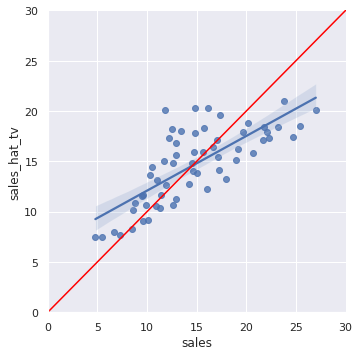

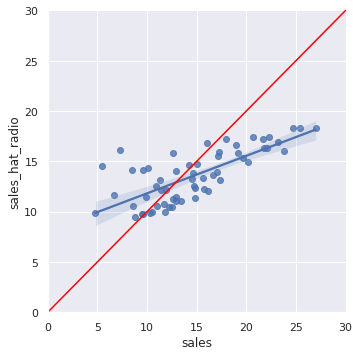

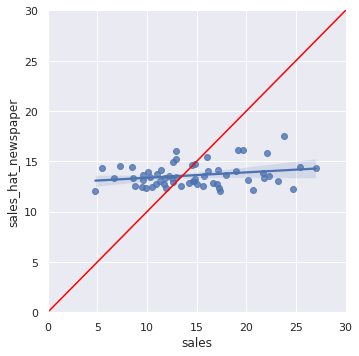

In [107]:
# add columns of predicted sales using the eache of the trained model
# and here I decide to use test data only because we are trying to see how our trained model behaves
test['sales_hat_tv'] = y_test_predict_tv
test['sales_hat_radio'] = y_test_predict_radio
test['sales_hat_newspaper'] = y_test_predict_newspaper

# values to draw a diagnal line y=x
x_line_diagnal = [0, 30]
y_line_diagnal = [0, 30]

# tv
# set x axis to be actual sales and y axis to be the predicted sales and plot
sns.lmplot(x="sales", y="sales_hat_tv", data=test);
# draw a line of y=x to show which model is better in this kind of plot
sns.lineplot(x_line_diagnal, y_line_diagnal, color='red');
# make x and y axes have same scale
plt.ylim(0, 30)
plt.xlim(0, 30)

# radio
sns.lmplot(x="sales", y="sales_hat_radio", data=test);
sns.lineplot(x_line_diagnal, y_line_diagnal, color='red');
plt.ylim(0, 30)
plt.xlim(0, 30)

# newspaper
sns.lmplot(x="sales", y="sales_hat_newspaper", data=test);
sns.lineplot(x_line_diagnal, y_line_diagnal, color='red');
plt.ylim(0, 30)
plt.xlim(0, 30)



From results above, we want to compare how the points above compare to the diagnal line because that indicate how close our predicted values are close to the actual sales. The more points on the line, the more effective our model predicts the new sales. And we can see there are more points lying on the line in the TV model, thats the same conclusion as we see before.

**residuals of y - y hat**

Since there are some calculations involved, will show that using regular plot library.

In [108]:
# Residuals and mean for each model
y_y_hat_residual_train_tv = train['sales'] - y_train_predict_tv
y_y_hat_residual_test_tv = test["sales"] - y_test_predict_tv

y_y_hat_residual_train_radio = train['sales'] - y_train_predict_radio
y_y_hat_residual_test_radio = test["sales"] - y_test_predict_radio

y_y_hat_residual_train_newspaper = train['sales'] - y_train_predict_newspaper
y_y_hat_residual_test_newspaper = test["sales"] - y_test_predict_newspaper



Compute the mean residuals for each of the model

In [109]:
mean_residual_tv = y_y_hat_residual_train_tv.mean()
mean_residual_radio = y_y_hat_residual_train_radio.mean()
mean_residual_newspaper = y_y_hat_residual_train_newspaper.mean()
print("Mean residual for TV model: ", mean_residual_tv)
print("Mean residual for radio model: ", mean_residual_radio)
print("Mean residual for newspaper model: ", mean_residual_newspaper)

Mean residual for TV model:  -1.0150610510858574e-15
Mean residual for radio model:  -1.0404375773630039e-15
Mean residual for newspaper model:  -1.6114094185987986e-15


The ideal mean residual should be as close as to zero. That means the difference between the actual value and predicted value should be close to zero, the more it closed to each other, the more the predicted data more 'fit' the actual data.



**plot of residuals**

(-10.0, 10.0)

(0.0, 30.0)

Text(0.5, 0, 'actual sales')

Text(0, 0.5, 'residual')

(-10.0, 10.0)

(0.0, 30.0)

Text(0.5, 0, 'actual sales')

Text(0, 0.5, 'residual')

(-10.0, 10.0)

(0.0, 30.0)

Text(0.5, 0, 'actual sales')

Text(0, 0.5, 'residual')

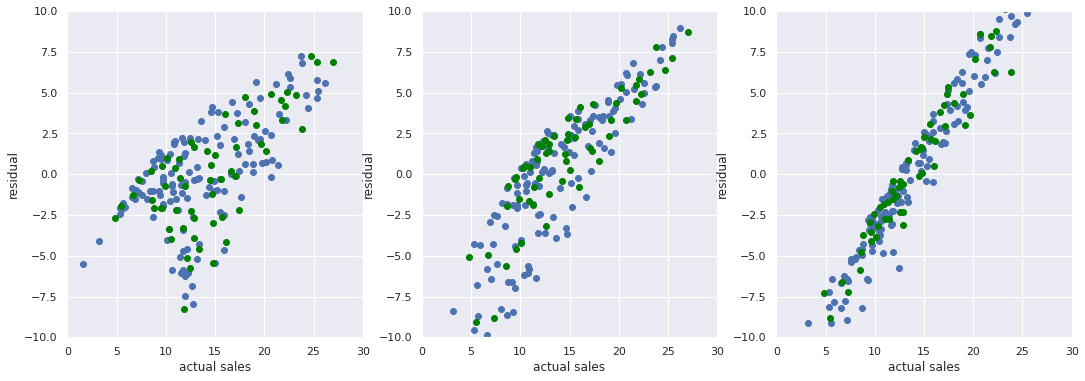

In [110]:
fig = plt.figure(figsize=(18,6))
plt.subplot(1,3,1)
# calculate the residual for both data sets for each of the model
plt.scatter(train['sales'], y_y_hat_residual_train_tv)
plt.scatter(test['sales'], y_y_hat_residual_test_tv, color="green")
plt.ylim(-10, 10)
plt.xlim(0, 30)
plt.xlabel("actual sales")
plt.ylabel("residual")

plt.subplot(1,3,2)
plt.scatter(train['sales'], y_y_hat_residual_train_radio)
plt.scatter(test['sales'], y_y_hat_residual_test_radio, color="green")
plt.ylim(-10, 10)
plt.xlim(0, 30)
plt.xlabel("actual sales")
plt.ylabel("residual")

plt.subplot(1,3,3)
plt.scatter(train['sales'], y_y_hat_residual_train_newspaper)
plt.scatter(test['sales'], y_y_hat_residual_test_newspaper, color="green")
plt.ylim(-10, 10)
plt.xlim(0, 30)
plt.xlabel("actual sales")
plt.ylabel("residual")

The observation from above plots is, there seems to be a trend when the actual sales goes from 0 to 30, the residual are also increasing from when the prediction is too high to prediction becomes too low. That indicate there are something in the model that we not captured so far.

**3 model and 3 feature plots**

(-10.0, 10.0)

(0.0, 300.0)

Text(0.5, 0, 'TV')

Text(0, 0.5, 'Residual TV')

Text(0.5, 1.0, 'TV Model Residual-TV')

(-10.0, 10.0)

(0.0, 50.0)

Text(0.5, 0, 'Radio')

Text(0, 0.5, 'Residual TV')

Text(0.5, 1.0, 'TV Model Residual-radio')

(-10.0, 10.0)

(0.0, 150.0)

Text(0.5, 0, 'Newspaper')

Text(0, 0.5, 'Residual TV')

Text(0.5, 1.0, 'TV Model Residual-newspaper')

(-10.0, 10.0)

(0.0, 300.0)

Text(0.5, 0, 'TV')

Text(0, 0.5, 'Residual radio')

Text(0.5, 1.0, 'Radio Model Residual-TV')

(-10.0, 10.0)

(0.0, 50.0)

Text(0.5, 0, 'Radio')

Text(0, 0.5, 'Residual radio')

Text(0.5, 1.0, 'Radio Model Residual-radio')

(-10.0, 10.0)

(0.0, 150.0)

Text(0.5, 0, 'Newspaper')

Text(0, 0.5, 'Residual radio')

Text(0.5, 1.0, 'Radio Model Residual-newspaper')

(-10.0, 10.0)

(0.0, 300.0)

Text(0.5, 0, 'TV')

Text(0, 0.5, 'Residual newspaper')

Text(0.5, 1.0, 'Newspaper Model Residual-TV')

(-10.0, 10.0)

(0.0, 50.0)

Text(0.5, 0, 'Radio')

Text(0, 0.5, 'Residual newspaper')

Text(0.5, 1.0, 'Newspaper Model Residual-Radio')

(-10.0, 10.0)

(0.0, 150.0)

Text(0.5, 0, 'Newpaper')

Text(0, 0.5, 'Residual newspaper')

Text(0.5, 1.0, 'Newspaper Model Residual-newspaper')

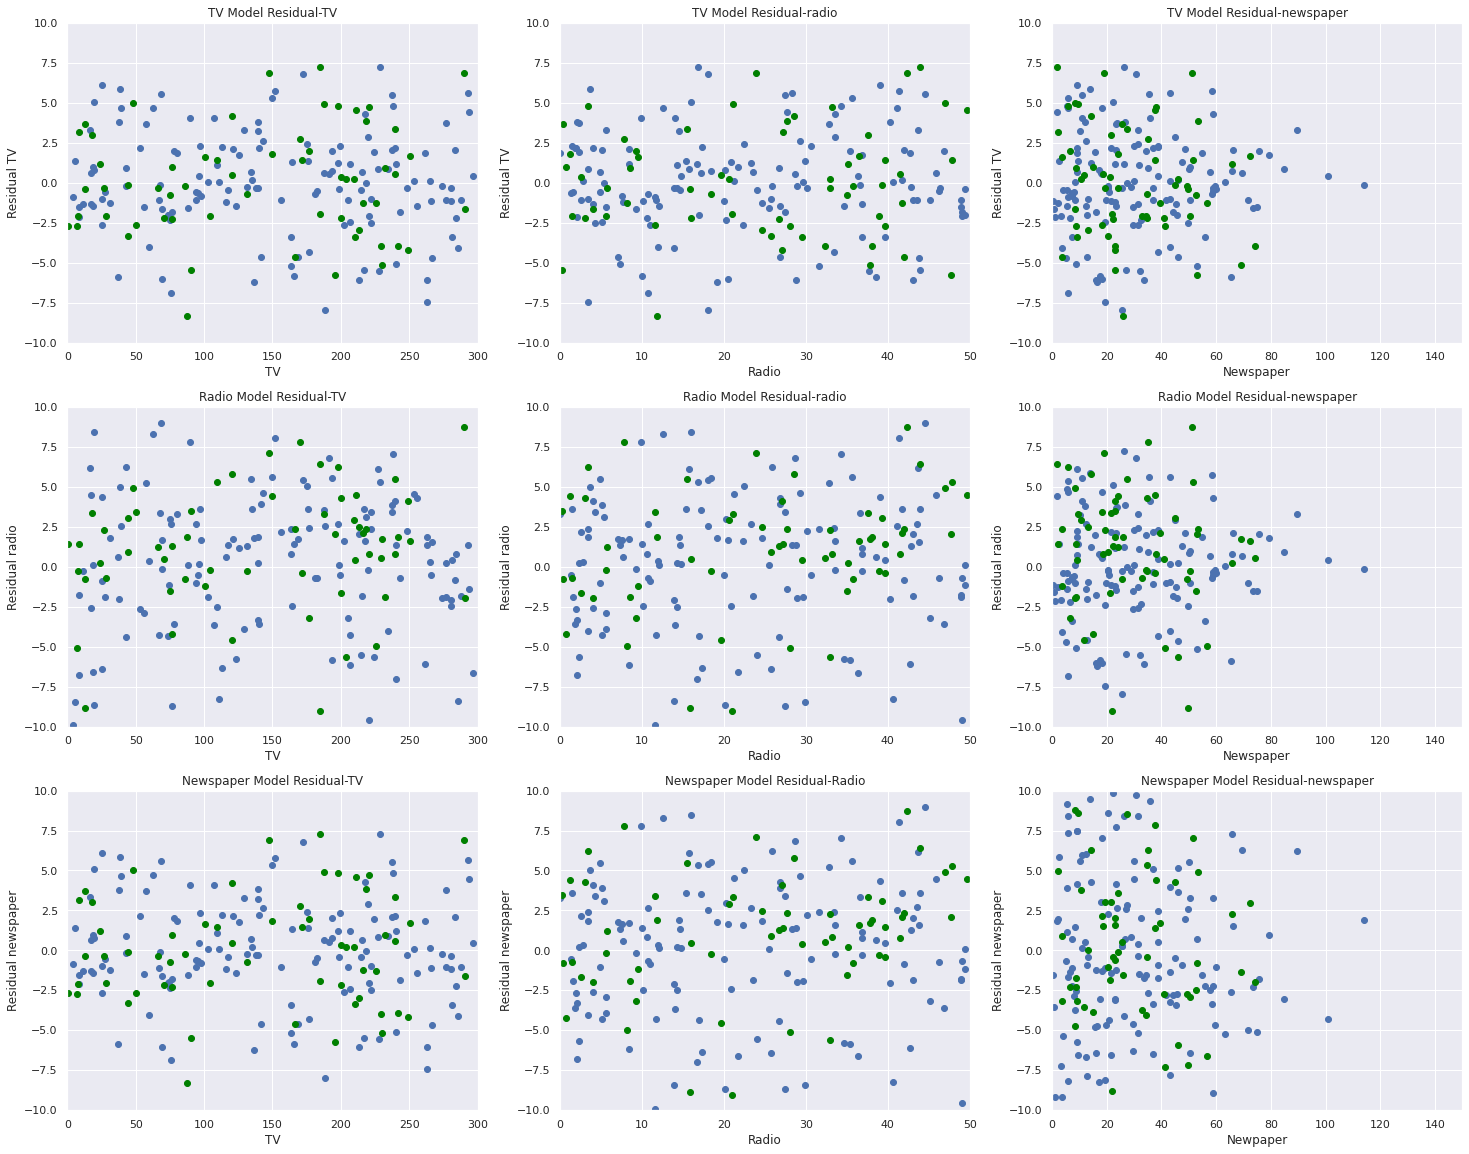

In [111]:
fig = plt.figure(figsize=(25,20))
plt.subplot(3,3,1)
# calculate the residual for both data sets for each of the model
plt.scatter(x_tv_train, y_y_hat_residual_train_tv)
plt.scatter(x_tv_test, y_y_hat_residual_test_tv, color="green")
plt.ylim(-10, 10)
plt.xlim(0, 300)
plt.xlabel("TV")
plt.ylabel("Residual TV")
plt.title("TV Model Residual-TV")

plt.subplot(3,3,2)
plt.scatter(x_radio_train, y_y_hat_residual_train_tv)
plt.scatter(x_radio_test, y_y_hat_residual_test_tv, color="green")
plt.ylim(-10, 10)
plt.xlim(0, 50)
plt.xlabel("Radio")
plt.ylabel("Residual TV")
plt.title("TV Model Residual-radio")

plt.subplot(3,3,3)
plt.scatter(x_newspaper_train, y_y_hat_residual_train_tv)
plt.scatter(x_newspaper_test, y_y_hat_residual_test_tv, color="green")
plt.ylim(-10, 10)
plt.xlim(0, 150)
plt.xlabel("Newspaper")
plt.ylabel("Residual TV")
plt.title("TV Model Residual-newspaper")

plt.subplot(3,3,4)
plt.scatter(x_tv_train, y_y_hat_residual_train_radio)
plt.scatter(x_tv_test, y_y_hat_residual_test_radio, color="green")
plt.ylim(-10, 10)
plt.xlim(0, 300)
plt.xlabel("TV")
plt.ylabel("Residual radio")
plt.title("Radio Model Residual-TV")

plt.subplot(3,3,5)
plt.scatter(x_radio_train, y_y_hat_residual_train_radio)
plt.scatter(x_radio_test, y_y_hat_residual_test_radio, color="green")
plt.ylim(-10, 10)
plt.xlim(0, 50)
plt.xlabel("Radio")
plt.ylabel("Residual radio")
plt.title("Radio Model Residual-radio")

plt.subplot(3,3,6)
plt.scatter(x_newspaper_train, y_y_hat_residual_train_tv)
plt.scatter(x_newspaper_test, y_y_hat_residual_test_radio, color="green")
plt.ylim(-10, 10)
plt.xlim(0, 150)
plt.xlabel("Newspaper")
plt.ylabel("Residual radio")
plt.title("Radio Model Residual-newspaper")

plt.subplot(3,3,7)
plt.scatter(x_tv_train, y_y_hat_residual_train_tv)
plt.scatter(x_tv_test, y_y_hat_residual_test_tv, color="green")
plt.ylim(-10, 10)
plt.xlim(0, 300)
plt.xlabel("TV")
plt.ylabel("Residual newspaper")
plt.title("Newspaper Model Residual-TV")

plt.subplot(3,3,8)
plt.scatter(x_radio_train, y_y_hat_residual_train_radio)
plt.scatter(x_radio_test, y_y_hat_residual_test_radio, color="green")
plt.ylim(-10, 10)
plt.xlim(0, 50)
plt.xlabel("Radio")
plt.ylabel("Residual newspaper")
plt.title("Newspaper Model Residual-Radio")

plt.subplot(3,3,9)
plt.scatter(x_newspaper_train, y_y_hat_residual_train_newspaper)
plt.scatter(x_newspaper_test, y_y_hat_residual_test_newspaper, color="green")
plt.ylim(-10, 10)
plt.xlim(0, 150)
plt.xlabel("Newpaper")
plt.ylabel("Residual newspaper")
plt.title("Newspaper Model Residual-newspaper")


From the results above. We can see that there is a clear trend in the 'Radio Model Residual-TV' and 'TV Model Residual-radio' plot that the residual goes up as the TV budget goes up. And there also are some trends on the plot above and below that plot the residual becomes much more discrete when budget of TV goes up. These pattern indicate there still exist some learnable info in our data but we did not include that in the model and we can improve our model later by utilizing those information.

**2.d)**

Fit in multiple linear regression model and print the coefficients and intercept


In [112]:
reg_multi = LinearRegression().fit(train[['TV', 'radio', 'newspaper']], train['sales'])
print("Coefficients (TV, radio, newspaper):", reg_multi.coef_)
print("Intercept: ", reg_multi.intercept_)

Coefficients (TV, radio, newspaper): [0.04674373 0.17590675 0.00319043]
Intercept:  2.89098128737122


Here, we got three coefficients as a tuple other than a constant number for each of the model when we did modeling for each type of ad. Also we observed the newspaper coefficients becomes neagtive which indicates it have some negative effect on the sales when a unit of newspaper budget changes. But in single linear regression, the newspaper contribute positive effect even it was trivial, that indicate there are somehow some correlation or interaction between newspaper and other type of ad that result to such difference which we could not find before in the singular model.

Then we compute MSE and R2 for multiple regression.

In [113]:
y_pred_multi_reg_train = reg_multi.predict(train[['TV', 'radio', 'newspaper']])
mse_multi_reg_train = 1.0/(len(train)) * np.sum((train["sales"] - y_pred_multi_reg_train)**2)
r2_multi_reg_train = 1-np.mean( (y_pred_multi_reg_train - train['sales'])**2 / np.std(train['sales'])**2 )
print("Multiple regression MSE on train data set: ", mse_multi_reg_train)
print("Multiple regression R2 on train data set: ", r2_multi_reg_train)

y_pred_multi_reg_test = reg_multi.predict(test[['TV', 'radio', 'newspaper']])
mse_multi_reg_test = 1.0/(len(test)) * np.sum((test["sales"] - y_pred_multi_reg_test)**2)
r2_multi_reg_test = 1-np.mean( (y_pred_multi_reg_test - test['sales'])**2 / np.std(test['sales'])**2 )
print("Multiple regression MSE on test data set: ", mse_multi_reg_test)
print("Multiple regression R2 on test data set: ", r2_multi_reg_test)

Multiple regression MSE on train data set:  3.0489615665109873
Multiple regression R2 on train data set:  0.8873879767494456
Multiple regression MSE on test data set:  2.306483338927096
Multiple regression R2 on test data set:  0.9128263665333984


From the R2 we can see our model seems behave well so far since it predicts data close to what we want as the R2 close to 1.

Next we repeat analysis from c):

**y again y hat for all three models.**

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


(0.0, 30.0)

(0.0, 30.0)

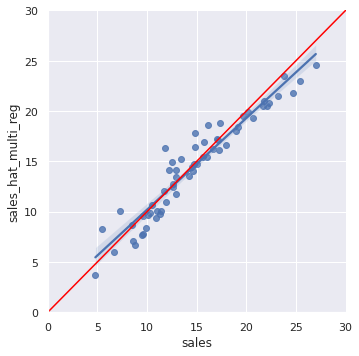

In [114]:
# add columns of predicted sales using the each of the trained model
# and here I decide to use test data only because we are trying to see how our trained model behaves
test['sales_hat_multi_reg'] = y_pred_multi_reg_test

# values to draw a diagnal line y=x
x_line_diagnal = [0, 30]
y_line_diagnal = [0, 30]

# tv
# set x axis to be actual sales and y axis to be the predicted sales and plot
sns.lmplot(x="sales", y="sales_hat_multi_reg", data=test);
# draw a line of y=x to show which model is better in this kind of plot
sns.lineplot(x_line_diagnal, y_line_diagnal, color='red');
# make x and y axes have same scale
plt.ylim(0, 30)
plt.xlim(0, 30)

As we can see from the plot the points scattered mostly on the red diagnal line we define which means the predict values using our regression model are very close the the actual sales we have in the test set. The model seems more reliable when we take all three features together than just do them individualy.

**residuals of y - y hat**

In [115]:
# Residuals and mean for multi regression model
y_y_hat_residual_train_multi_reg = train['sales'] - y_pred_multi_reg_train
y_y_hat_residual_test_multi_reg = test["sales"] - y_pred_multi_reg_test

mean_residual_multi_train = y_y_hat_residual_train_multi_reg.mean()
mean_residual_multi_test = y_y_hat_residual_test_multi_reg.mean()
print("Mean residual for multi regression model train set: ", mean_residual_multi_train)
print("Mean residual for multi regression model test set: ", mean_residual_multi_test)

Mean residual for multi regression model train set:  -9.70652130100851e-16
Mean residual for multi regression model test set:  0.22809645071809395


Here our residual of y - y hat on test data slightly higher and not close to zero. A well fitted model should have this value close to zero so that the predict values are as close close to the existing values.

**plot of residuals**

(-10.0, 10.0)

(0.0, 30.0)

Text(0.5, 0, 'actual sales')

Text(0, 0.5, 'residual')

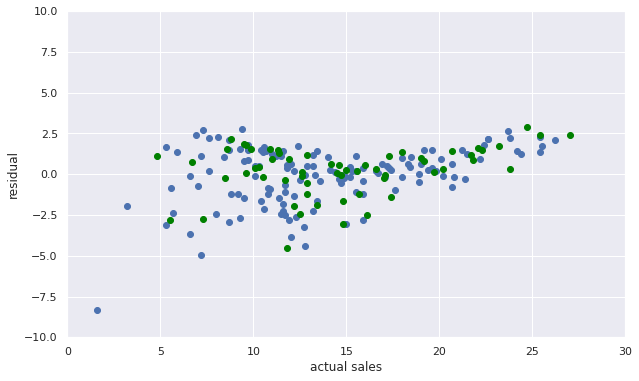

In [116]:
fig = plt.figure(figsize=(10,6))
# calculate the residual for both data sets for each of the model
plt.scatter(train['sales'], y_y_hat_residual_train_multi_reg)
plt.scatter(test['sales'], y_y_hat_residual_test_multi_reg, color="green")
plt.ylim(-10, 10)
plt.xlim(0, 30)
plt.xlabel("actual sales")
plt.ylabel("residual")

We expect that the residuals mostly close to the horizontal line of 0. We can see on the plot most of the points are actually close to that line. However, there are some outliers when sales are small and high, that could result to the non-zero mean residual we saw before.

**3 features and residual plots**

(-5.0, 5.0)

(0.0, 300.0)

Text(0.5, 0, 'TV')

Text(0, 0.5, 'Residual Multi Regression')

Text(0.5, 1.0, 'Residual Multi Regression-TV')

(-5.0, 5.0)

(0.0, 50.0)

Text(0.5, 0, 'Radio')

Text(0, 0.5, 'Residual Multi Regression')

Text(0.5, 1.0, 'Residual Multi Regression-radio')

(-5.0, 5.0)

(0.0, 150.0)

Text(0.5, 0, 'Newspaper')

Text(0, 0.5, 'Residual Multi Regression')

Text(0.5, 1.0, 'Residual Multi Regression-newspaper')

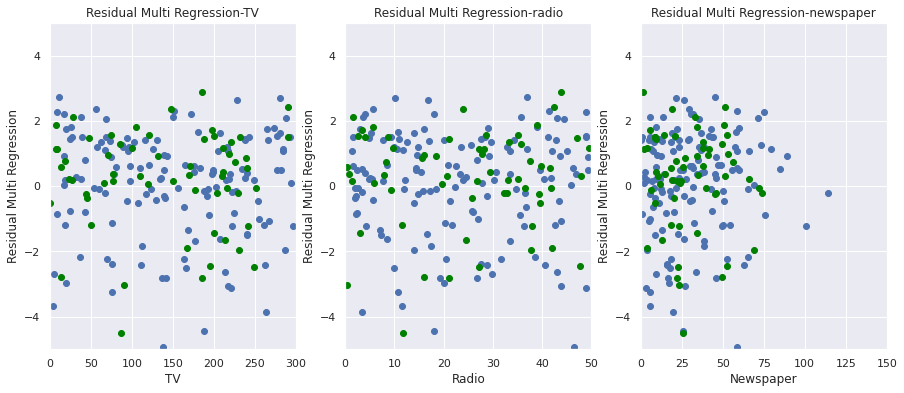

In [117]:
fig = plt.figure(figsize=(15,6))
plt.subplot(1,3,1)
# calculate the residual for both data sets for each of the feature
plt.scatter(x_tv_train, y_y_hat_residual_train_multi_reg)
plt.scatter(x_tv_test, y_y_hat_residual_test_multi_reg, color="green")
plt.ylim(-5, 5)
plt.xlim(0, 300)
plt.xlabel("TV")
plt.ylabel("Residual Multi Regression")
plt.title("Residual Multi Regression-TV")

plt.subplot(1,3,2)
# calculate the residual for both data sets for each of the feature
plt.scatter(x_radio_train, y_y_hat_residual_train_multi_reg)
plt.scatter(x_radio_test, y_y_hat_residual_test_multi_reg, color="green")
plt.ylim(-5, 5)
plt.xlim(0, 50)
plt.xlabel("Radio")
plt.ylabel("Residual Multi Regression")
plt.title("Residual Multi Regression-radio")

plt.subplot(1,3,3)
# calculate the residual for both data sets for each of the feature
plt.scatter(x_newspaper_train, y_y_hat_residual_train_multi_reg)
plt.scatter(x_newspaper_test, y_y_hat_residual_test_multi_reg, color="green")
plt.ylim(-5, 5)
plt.xlim(0, 150)
plt.xlabel("Newspaper")
plt.ylabel("Residual Multi Regression")
plt.title("Residual Multi Regression-newspaper")



From the plots above it seems like there are no obvious patterns among those plots and it means that when we do this multi regression model when all features are included and there are not much 'learnable' in the data set that we have not captured.

**2.e)**


Add additional interaction features to data set and fit it in multiple linear regression model and print the coefficients and intercept


In [118]:
# add additional four features to train and test data set

train['newspaper_radio'] = train["newspaper"] * train["radio"]
train['tv_radio'] = train["TV"] * train["radio"]
train['newspaper_tv'] = train["newspaper"] * train["TV"]
train['newspaper_radio_tv'] = train["newspaper"] * train["radio"] * train["TV"]

test['newspaper_radio'] = test["newspaper"] * test["radio"]
test['tv_radio'] = test["TV"] * test["radio"]
test['newspaper_tv'] = test["newspaper"] * test["TV"]
test['newspaper_radio_tv'] = test["newspaper"] * test["radio"] * test["TV"]

reg_multi_interation = LinearRegression().fit(train[['TV', 'radio', 'newspaper', 'newspaper_radio', 'tv_radio', 'newspaper_tv', 'newspaper_radio_tv']], train['sales'])
print("Coefficients (TV, radio, newspaper, newspaper_radio, tv_radio, newspaper_tv, newspaper_radio_tv):", reg_multi_interation.coef_)
print("Intercept: ", reg_multi_interation.intercept_)

Coefficients (TV, radio, newspaper, newspaper_radio, tv_radio, newspaper_tv, newspaper_radio_tv): [ 1.90575609e-02  1.32059460e-02  4.92188669e-03  2.39851675e-04
  1.19070516e-03 -1.66860488e-05 -1.65035500e-06]
Intercept:  6.6803500458170735


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

Then we compute MSE and R2 for multiple regression.

In [119]:
y_pred_multi_reg_interaction_train = reg_multi_interation.predict(train[['TV', 'radio', 'newspaper', 'newspaper_radio', 'tv_radio', 'newspaper_tv', 'newspaper_radio_tv']])
mse_multi_reg_interaction_train = 1.0/(len(train)) * np.sum((train["sales"] - y_pred_multi_reg_interaction_train)**2)
r2_multi_reg_interaction_train = 1-np.mean( (y_pred_multi_reg_interaction_train - train['sales'])**2 / np.std(train['sales'])**2 )
print("Multiple regression for all seven features MSE on train data set: ", mse_multi_reg_interaction_train)
print("Multiple regression for all seven features R2 on train data set: ", r2_multi_reg_interaction_train)

y_pred_multi_reg_interaction_test = reg_multi_interation.predict(test[['TV', 'radio', 'newspaper', 'newspaper_radio', 'tv_radio', 'newspaper_tv', 'newspaper_radio_tv']])
mse_multi_reg_interaction_test = 1.0/(len(test)) * np.sum((test["sales"] - y_pred_multi_reg_interaction_test)**2)
r2_multi_reg_interaction_test = 1-np.mean( (y_pred_multi_reg_interaction_test - test['sales'])**2 / np.std(test['sales'])**2 )
print("Multiple regression for all seven features MSE on test data set: ", mse_multi_reg_interaction_test)
print("Multiple regression for all seven features R2 on test data set: ", r2_multi_reg_interaction_test)

Multiple regression for all seven features MSE on train data set:  0.9687992106114828
Multiple regression for all seven features R2 on train data set:  0.9642178371715773
Multiple regression for all seven features MSE on test data set:  0.5830953342784767
Multiple regression for all seven features R2 on test data set:  0.9779618876544227


From the R2 we can see our model seems behave well so far since it predicts data close to what we want as the R2 close to 1.

Next we repeat analysis from c):

**y again y hat for all three models.**

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


(0.0, 30.0)

(0.0, 30.0)

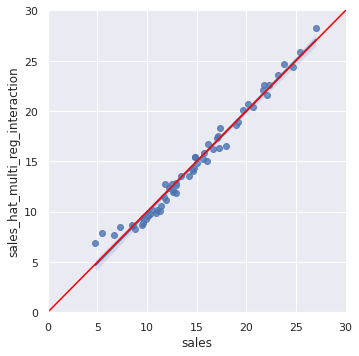

In [120]:
# add columns of predicted sales using the each of the trained model
# and here I decide to use test data only because we are trying to see how our trained model behaves
test['sales_hat_multi_reg_interaction'] = y_pred_multi_reg_interaction_test

# values to draw a diagnal line y=x
x_line_diagnal = [0, 30]
y_line_diagnal = [0, 30]

# tv
# set x axis to be actual sales and y axis to be the predicted sales and plot
sns.lmplot(x="sales", y="sales_hat_multi_reg_interaction", data=test);
# draw a line of y=x to show which model is better in this kind of plot
sns.lineplot(x_line_diagnal, y_line_diagnal, color='red');
# make x and y axes have same scale
plt.ylim(0, 30)
plt.xlim(0, 30)

The model seems more reliable when we take all seven features together than just normal multiple regrssion and do them individually. As we can see from the plot the points scattered mostly on the red diagnal line we define which means the predict values using our regression model are very close the the actual sales we have in the test set. 

**residuals of y - y hat**

In [121]:
# Residuals and mean for multi regression model
y_y_hat_residual_train_multi_reg_interaction = train['sales'] - y_pred_multi_reg_interaction_train
y_y_hat_residual_test_multi_reg_interaction = test["sales"] - y_pred_multi_reg_interaction_test

mean_residual_multi_train_interaction = y_y_hat_residual_train_multi_reg_interaction.mean()
mean_residual_multi_test_interaction = y_y_hat_residual_test_multi_reg_interaction.mean()
print("Mean residual for multi regression on all seven features model train set: ", mean_residual_multi_train_interaction)
print("Mean residual for multi regression on all seven features model test set: ", mean_residual_multi_test_interaction)

Mean residual for multi regression on all seven features model train set:  -1.4020530768123405e-15
Mean residual for multi regression on all seven features model test set:  0.03834730668401762


Here we got more or less the same result as we did multi regression on only three features. But the result is still acceptable and it produced a reasonable prediction. The larger on test set could because of some outliers.

**plot of residuals**

(-10.0, 10.0)

(0.0, 30.0)

Text(0.5, 0, 'actual sales')

Text(0, 0.5, 'residual')

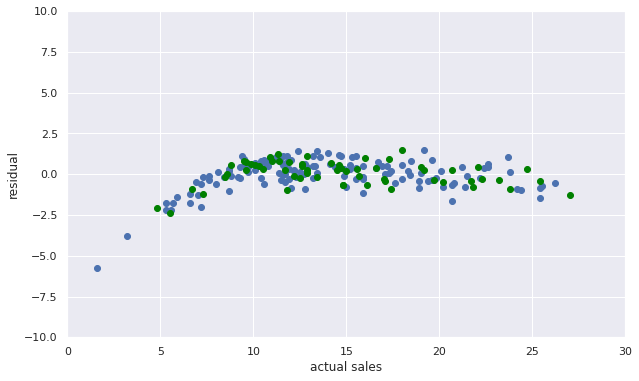

In [122]:
fig = plt.figure(figsize=(10,6))
# calculate the residual for both data sets for each of the model
plt.scatter(train['sales'], y_y_hat_residual_train_multi_reg_interaction)
plt.scatter(test['sales'], y_y_hat_residual_test_multi_reg_interaction, color="green")
plt.ylim(-10, 10)
plt.xlim(0, 30)
plt.xlabel("actual sales")
plt.ylabel("residual")

Here it seems we get a better residal plot than before used only three features. We expect that the residuals mostly close to the horizontal line of 0. We can see on the plot most of the points are actually close to that line. However, there are still some outliers when sales are small, especially the outlier on test data set which could affect our mean before.

**7 features and residual plots**

(-5.0, 5.0)

(0.0, 300.0)

Text(0.5, 0, 'TV')

Text(0, 0.5, 'Residual Multi Regression 7 features')

Text(0.5, 1.0, 'Residual Multi Regression-TV')

(-5.0, 5.0)

(0.0, 50.0)

Text(0.5, 0, 'Radio')

Text(0, 0.5, 'Residual Multi Regression 7 features')

Text(0.5, 1.0, 'Residual Multi Regression-radio')

(-5.0, 5.0)

(0.0, 150.0)

Text(0.5, 0, 'Newspaper')

Text(0, 0.5, 'Residual Multi Regression 7 features')

Text(0.5, 1.0, 'Residual Multi Regression-newspaper')

(-5.0, 5.0)

(0.0, 6000.0)

Text(0.5, 0, 'Newspaper * Radio')

Text(0, 0.5, 'Residual Multi Regression 7 features')

Text(0.5, 1.0, 'Residual Multi Regression-newspaper and radio')

(-5.0, 5.0)

(0.0, 15000.0)

Text(0.5, 0, 'TV * radio')

Text(0, 0.5, 'Residual Multi Regression 7 features')

Text(0.5, 1.0, 'Residual Multi Regression-TV and radio')

(-5.0, 5.0)

(0.0, 15000.0)

Text(0.5, 0, 'Newspaper * TV')

Text(0, 0.5, 'Residual Multi Regression 7 features')

Text(0.5, 1.0, 'Residual Multi Regression-newspaper and TV')

(-5.0, 5.0)

(0.0, 150000.0)

Text(0.5, 0, 'Newspaper * radio * TV')

Text(0, 0.5, 'Residual Multi Regression 7 features')

Text(0.5, 1.0, 'Residual Multi Regression-newspaper and radio and TV')

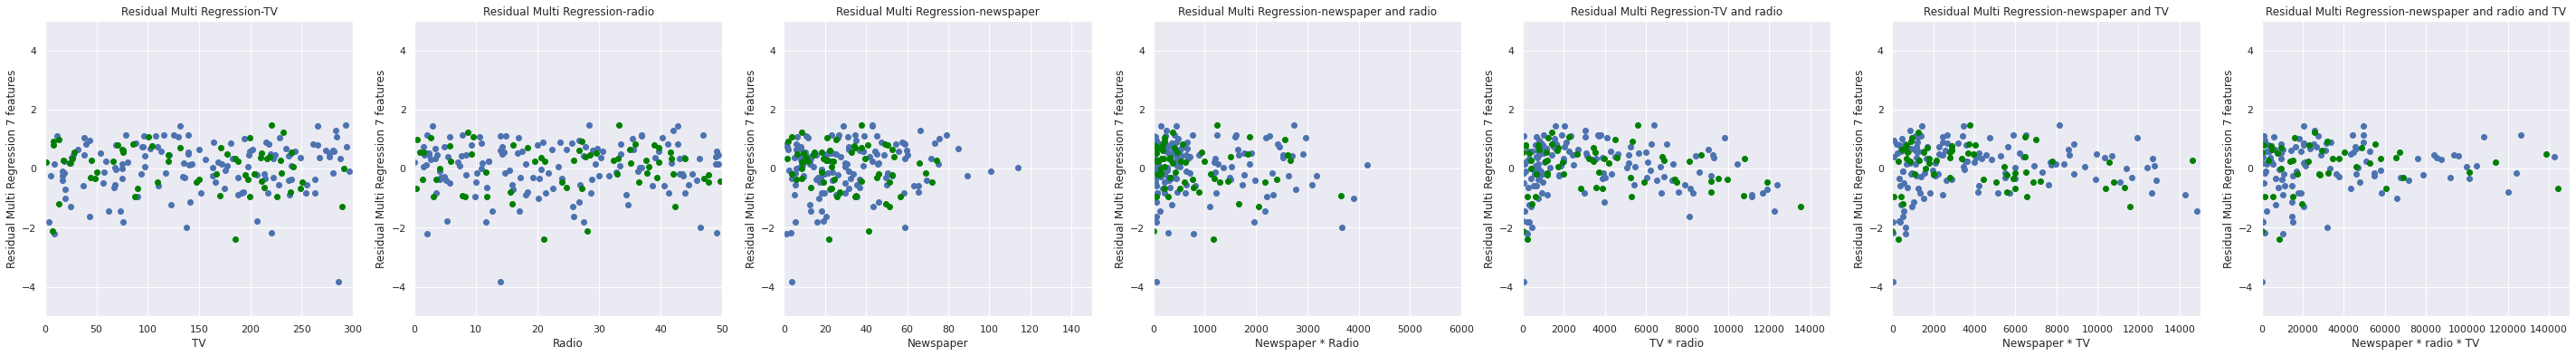

In [123]:
fig = plt.figure(figsize=(50,6))
plt.subplot(1,7,1)
# calculate the residual for both data sets for each of the feature
plt.scatter(x_tv_train, y_y_hat_residual_train_multi_reg_interaction)
plt.scatter(x_tv_test, y_y_hat_residual_test_multi_reg_interaction, color="green")
plt.ylim(-5, 5)
plt.xlim(0, 300)
plt.xlabel("TV")
plt.ylabel("Residual Multi Regression 7 features")
plt.title("Residual Multi Regression-TV")

plt.subplot(1,7,2)
# calculate the residual for both data sets for each of the feature
plt.scatter(x_radio_train, y_y_hat_residual_train_multi_reg_interaction)
plt.scatter(x_radio_test, y_y_hat_residual_test_multi_reg_interaction, color="green")
plt.ylim(-5, 5)
plt.xlim(0, 50)
plt.xlabel("Radio")
plt.ylabel("Residual Multi Regression 7 features")
plt.title("Residual Multi Regression-radio")

plt.subplot(1,7,3)
# calculate the residual for both data sets for each of the feature
plt.scatter(x_newspaper_train, y_y_hat_residual_train_multi_reg_interaction)
plt.scatter(x_newspaper_test, y_y_hat_residual_test_multi_reg_interaction, color="green")
plt.ylim(-5, 5)
plt.xlim(0, 150)
plt.xlabel("Newspaper")
plt.ylabel("Residual Multi Regression 7 features")
plt.title("Residual Multi Regression-newspaper")

plt.subplot(1,7,4)
# calculate the residual for both data sets for each of the feature
plt.scatter(train["newspaper_radio"], y_y_hat_residual_train_multi_reg_interaction)
plt.scatter(test['newspaper_radio'], y_y_hat_residual_test_multi_reg_interaction, color="green")
plt.ylim(-5, 5)
plt.xlim(0, 6000)
plt.xlabel("Newspaper * Radio")
plt.ylabel("Residual Multi Regression 7 features")
plt.title("Residual Multi Regression-newspaper and radio")

plt.subplot(1,7,5)
# calculate the residual for both data sets for each of the feature
plt.scatter(train['tv_radio'], y_y_hat_residual_train_multi_reg_interaction)
plt.scatter(test['tv_radio'], y_y_hat_residual_test_multi_reg_interaction, color="green")
plt.ylim(-5, 5)
plt.xlim(0, 15000)
plt.xlabel("TV * radio")
plt.ylabel("Residual Multi Regression 7 features")
plt.title("Residual Multi Regression-TV and radio")

plt.subplot(1,7,6)
# calculate the residual for both data sets for each of the feature
plt.scatter(train['newspaper_tv'], y_y_hat_residual_train_multi_reg_interaction)
plt.scatter(test['newspaper_tv'], y_y_hat_residual_test_multi_reg_interaction, color="green")
plt.ylim(-5, 5)
plt.xlim(0, 15000)
plt.xlabel("Newspaper * TV")
plt.ylabel("Residual Multi Regression 7 features")
plt.title("Residual Multi Regression-newspaper and TV")

plt.subplot(1,7,7)
# calculate the residual for both data sets for each of the feature
plt.scatter(train['newspaper_radio_tv'], y_y_hat_residual_train_multi_reg_interaction)
plt.scatter(test['newspaper_radio_tv'], y_y_hat_residual_test_multi_reg_interaction, color="green")
plt.ylim(-5, 5)
plt.xlim(0, 150000)
plt.xlabel("Newspaper * radio * TV")
plt.ylabel("Residual Multi Regression 7 features")
plt.title("Residual Multi Regression-newspaper and radio and TV")

The additional features actually helps better to explain the effects on ads, firstly the model that trained by additional interaction of features inmprove the accuracy and prediction and that can be derived from the MSE and R2 and the analysis before this question. Secondly from the plots above we can see for the TV-radio plot and newspaper-TV plot, the residual seems more close to 0 than newspaer-radio, that indicates the sales are actually more dominated by TV and less for the other two types of ad. 

Also if we observe those two plots, we can still see a very light pattern that when the value of tv*radio and newspaper*tv is small, the absolute residual seems away from 0 but it is approaching 0 while the value goes up, but we cannot observe such patter in plot number four. That means potentially if we want to imporve the model better, we can try to do something on those interations later and get rid of the individual feature.